In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smart_home_device_usage_data.csv')
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [3]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [5]:
df.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [6]:
df['DeviceType'].value_counts()

DeviceType
Smart Speaker      1108
Camera             1101
Lights             1087
Security System    1068
Thermostat         1039
Name: count, dtype: int64

In [7]:
# thermostat devices include HVAC,AC,Heaters etc
# dropping user_id column 

df = df.drop(columns =['UserID'])
df.head()

,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,Smart Speaker,15.307188,1.961607,1,4,36,1
1,Camera,19.973343,8.610689,1,0,29,1
2,Security System,18.911535,2.651777,1,0,20,1
3,Camera,7.011127,2.341653,0,3,15,0
4,Camera,22.610684,4.859069,1,3,36,1


In [8]:
df.shape

(5403, 7)

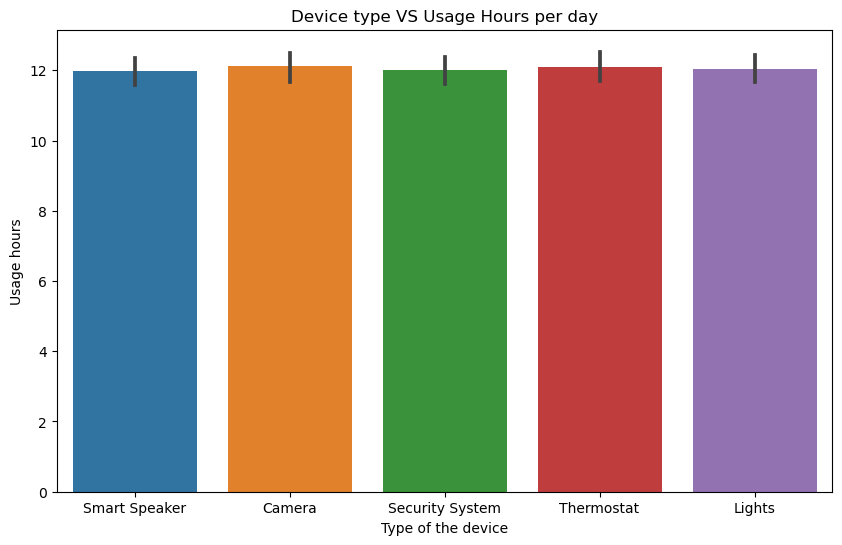

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x = df['DeviceType'], y=df['UsageHoursPerDay'], data=df)
plt.title('Device type VS Usage Hours per day')
plt.xlabel('Type of the device')
plt.ylabel('Usage hours')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [11]:
X = df.drop('SmartHomeEfficiency', axis=1)
y = df['SmartHomeEfficiency']

In [12]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [13]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([('OneHotEncoder',cat_transformer,cat_features),('StandardScalar',num_transformer,num_features),])
X = preprocessor.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((3620, 10), (1783, 10))

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred_train_lr = model.predict(X_train)

y_pred_test_lr = model.predict(X_test)

accuracy_train = accuracy_score(y_pred_train_lr,y_train)
print(accuracy_train)

0.8773480662983425


In [17]:
confusion_matrix = confusion_matrix(y_pred_train_lr,y_train)
print(confusion_matrix)

[[2042  223]
 [ 221 1134]]


In [18]:
print(classification_report(y_pred_train_lr,y_train))  # for logistic regression on train

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2265
           1       0.84      0.84      0.84      1355

    accuracy                           0.88      3620
   macro avg       0.87      0.87      0.87      3620
weighted avg       0.88      0.88      0.88      3620



In [19]:
                                                       # Logistic regression on Test set
print(classification_report(y_pred_test_lr,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1095
           1       0.83      0.82      0.82       688

    accuracy                           0.86      1783
   macro avg       0.86      0.85      0.86      1783
weighted avg       0.86      0.86      0.86      1783



In [20]:
model_rf = RandomForestClassifier()            # new model - random forest 
 
model_rf.fit(X_train,y_train)

y_pred_train = model_rf.predict(X_train)

y_pred_test = model_rf.predict(X_test)

In [22]:
print(classification_report(y_pred_train,y_train))                  # for training set of RF

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2263
           1       1.00      1.00      1.00      1357

    accuracy                           1.00      3620
   macro avg       1.00      1.00      1.00      3620
weighted avg       1.00      1.00      1.00      3620



In [23]:
print(classification_report(y_pred_test,y_test))                # testing Rf

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1126
           1       0.92      0.95      0.94       657

    accuracy                           0.95      1783
   macro avg       0.95      0.95      0.95      1783
weighted avg       0.95      0.95      0.95      1783



In [24]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred_train_dt = model_DT.predict(X_train)

y_pred_test_dt = model_DT.predict(X_test)

In [27]:
print(classification_report(y_pred_train_dt,y_train))      # training set of DT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2263
           1       1.00      1.00      1.00      1357

    accuracy                           1.00      3620
   macro avg       1.00      1.00      1.00      3620
weighted avg       1.00      1.00      1.00      3620



In [28]:
print(classification_report(y_pred_test_dt,y_test))        # testing set DT

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1105
           1       0.86      0.86      0.86       678

    accuracy                           0.89      1783
   macro avg       0.89      0.89      0.89      1783
weighted avg       0.89      0.89      0.89      1783



In [29]:
model_Knn = KNeighborsClassifier()
model_Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred_train_knn = model_Knn.predict(X_train)

y_pred_test_knn = model_Knn.predict(X_test)

In [32]:
print(classification_report(y_pred_train_knn,y_train))   # training of KNN 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2326
           1       0.89      0.93      0.91      1294

    accuracy                           0.93      3620
   macro avg       0.92      0.93      0.93      3620
weighted avg       0.93      0.93      0.93      3620



In [33]:
print(classification_report(y_pred_test_knn,y_test))    # testing of KNN

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1128
           1       0.86      0.89      0.88       655

    accuracy                           0.91      1783
   macro avg       0.90      0.91      0.90      1783
weighted avg       0.91      0.91      0.91      1783



In [34]:
model_svm = SVC(probability=True)
model_svm.fit(X_train,y_train)


SVC(probability=True)

In [35]:
y_pred_train_sv = model_svm.predict(X_train)

y_pred_test_sv = model_svm.predict(X_test)

In [37]:
print(classification_report(y_pred_train_sv,y_train))   # training SVC

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2313
           1       0.87      0.91      0.89      1307

    accuracy                           0.92      3620
   macro avg       0.91      0.91      0.91      3620
weighted avg       0.92      0.92      0.92      3620



In [38]:
print(classification_report(y_pred_test_sv,y_test))     # testing SVC

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1125
           1       0.87      0.90      0.88       658

    accuracy                           0.91      1783
   macro avg       0.91      0.91      0.91      1783
weighted avg       0.91      0.91      0.91      1783



In [39]:
# plotting ROC and AOC curves
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [40]:
y_pred_proba_log_reg = model.predict_proba(X_test)[:, 1]
y_pred_proba_dt = model_DT.predict_proba(X_test)[:, 1]
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_proba_knn = model_Knn.predict_proba(X_test)[:, 1]
y_pred_proba_svm = model_svm.predict_proba(X_test)[:, 1]

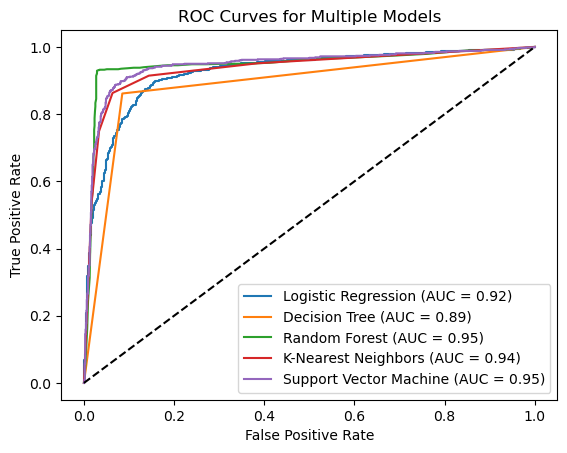

In [41]:
# logistic regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Support Vector Machine
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')

In [ ]:
import joblib 
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl') 

In [ ]:
joblib.dump(model_rf, 'model_rf.pkl')

In [ ]:
%%writefile C:/Users/madir/OneDrive/Desktop/smart_home_app.py
import streamlit as st
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import streamlit_authenticator as stauth
import sqlite3

conn = sqlite3.connect('smart_home.db')
c=conn.cursor()
c.execute('''CREAT TABLE IF NOT EXISTS users(username TEXT, password TEXT)''')
c.execute('''CREATE TABLE IF NOT EXISTS devices (username TEXT, device_type TEXT, usage_hours INTEGER, energy_consumption REAL, user_preference INTEGER, malfunction_incidents INTEGER, device_age INTEGER)''')

names = ["Srujana"]
usernames = ["Srushob"]
passwords = ["123"]

hashed_passwords = stauth.Hasher(passwords).generate()

# Load preprocessor and model
preprocessor_path = r'C:\Users\madir\preprocessor.pkl'
model_path = r"C:\Users\madir\model_rf.pkl"
model = joblib.load(model_path)
preprocessor = joblib.load(preprocessor_path)

# Set page configuration
st.set_page_config(page_title='Smart Device', layout='wide')

# Navigation state
if 'page' not in st.session_state:
    st.session_state.page = 'main'

def navigate_to(page):
    st.session_state.page = page

# Main page
if st.session_state.page == 'main':
    st.subheader("Hi! Welcome to the Smart Home Detector App!")
    st.title('Give the inputs of your device below:')

    device_type = st.selectbox('Select Device Type:', ['Smart Speaker', 'Camera', 'Lights', 'Security System', 'Thermostat'])
    device_usage = st.number_input('Enter Device Usage (hours per day):', min_value=0)
    energy_consumption = st.number_input('Enter Energy Consumption (kWh):', min_value=0.0)
    st.write('[Refer about your device energy consumption and accordingly fill the above](file:///C:/Users/madir/OneDrive/Desktop/smart_home.html)')
    user_preference = st.radio('Is this user preferred?', [0, 1])

    malfunction_incidents = st.number_input('Enter Number of Malfunction Incidents:', min_value=0)
    device_age = st.number_input('Enter the age of the device in months:', min_value=0)

    col1, col2, col3 = st.columns([1, 1, 1])
    with col2:
        if st.button('Submit'):
            input_data = pd.DataFrame([[device_type, device_usage, energy_consumption, user_preference, malfunction_incidents, device_age]],
                                      columns=['DeviceType', 'UsageHoursPerDay', 'EnergyConsumption', 'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths'])
            st.session_state.input_data = input_data
            navigate_to('prediction')

# Prediction page
if st.session_state.page == 'prediction':
    st.write('### Entered Data:')
    st.write(st.session_state.input_data)

    processed_data = preprocessor.transform(st.session_state.input_data)
    prediction = model.predict(processed_data)

    if prediction[0] == 1:
        st.write('Great! The smart device is efficient.')
    else:
        st.write('Oops! The smart device is not efficient.')

    if st.button('Go to Visualizations'):
        navigate_to('visualizations')

# Visualizations page
if st.session_state.page == 'visualizations':
    st.title('Visualizations')

    typical_power_consumption = {
        'Smart Speaker': 0.05,
        'Camera': 0.25,
        'Lights': 0.1,
        'Security System': 0.3,
        'Thermostat': 0.04
    }

    device_type = st.session_state.input_data['DeviceType'][0]
    usage_hours = st.session_state.input_data['UsageHoursPerDay'][0]
    user_energy = st.session_state.input_data['EnergyConsumption'][0]

    # Calculate typical energy consumption based on usage hours
    user_total_energy = user_energy * usage_hours
    typical_energy_per_hour = typical_power_consumption.get(device_type, 0.1)
    typical_energy = typical_energy_per_hour * usage_hours

    # Data for plotting
    data = {
        'Type': ['User Entered', 'Typical'],
        'Energy Consumption': [user_total_energy, typical_energy]
    }

    df = pd.DataFrame(data)

    # Plotting bar chart with reduced figure size
    fig, ax = plt.subplots(figsize=(3, 1))
    df.plot(kind='bar', x='Type', y='Energy Consumption', ax=ax)
    plt.title(f'Energy Consumption for {device_type}')
    plt.ylabel('Energy Consumption (kWh)')

    st.pyplot(fig)

    if st.button('Back to Main Page'):
        navigate_to('main')
